In [1]:
import pandas as pd
import numpy as np
import statistics
from matplotlib import pyplot as plt

In [2]:
%store -r trades

In [3]:
trades

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,StopLoss,EntryTime,ExitTime,OneR,Params,Duration
0,0.25,9021,9033,6905.09,7079.28,0.30,portion,2018-08-28 01:00:00,2018-08-28 13:00:00,143.60,"[54, 445]",0 days 12:00:00
1,0.75,9021,9222,6905.09,7025.75,0.63,2R,2018-08-28 01:00:00,2018-09-05 10:00:00,143.60,"[54, 445]",8 days 09:00:00
2,0.25,9760,9789,6669.36,6525.88,-0.25,portion,2018-09-27 20:00:00,2018-09-29 01:00:00,143.48,"[54, 445]",1 days 05:00:00
3,0.75,9760,9789,6669.36,6525.88,-0.75,initial,2018-09-27 20:00:00,2018-09-29 01:00:00,143.48,"[54, 445]",1 days 05:00:00
4,0.25,10179,10179,7410.09,7053.91,-0.25,portion,2018-10-15 07:00:00,2018-10-15 07:00:00,356.12,"[54, 445]",0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.75,47386,47429,18284.91,20323.74,4.02,2R,2023-01-12 14:00:00,2023-01-14 09:00:00,380.24,"[47, 383]",1 days 19:00:00
260,0.25,47430,47506,20523.75,21494.97,0.30,portion,2023-01-14 10:00:00,2023-01-17 14:00:00,809.35,"[47, 383]",3 days 04:00:00
261,0.75,47430,47706,20523.75,23198.57,2.48,2R,2023-01-14 10:00:00,2023-01-25 22:00:00,809.35,"[47, 383]",11 days 12:00:00
262,0.25,47780,47781,23021.40,23335.09,0.30,portion,2023-01-29 00:00:00,2023-01-29 01:00:00,260.41,"[47, 383]",0 days 01:00:00


In [4]:
trade_R = trades.PnL.rolling(2).sum()[1::2].reset_index(drop=True)

In [213]:
def max_drawdown_calc(prices):
    """
    Calculate the maximum drawdown of a list of prices.
    """
    max_drawdown = 0
    peak = prices[0]
    for price in prices:
        if price > peak:
            peak = price
        drawdown = (peak - price) / peak
        if drawdown > max_drawdown:
            max_drawdown = drawdown
    return 100 * max_drawdown

def print_stats(cum_sum_list, equity_list, n_trades, n_years):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
    for i in range(len(equity_list)):
        axes[0].plot(equity_list[i])
    
    final_equity = [equity[-1] for equity in equity_list]
    maximum = np.max(np.array(final_equity))
    minimum = np.min(np.array(final_equity))
    median_return = np.median([cum_sum[-1] for cum_sum in cum_sum_list])
    max_drawdown_from_base_list = [100 - min(equity) for equity in equity_list]
    max_drawdown_from_base = np.max(max_drawdown_from_base_list)
    median_drawdown_from_base = np.median(max_drawdown_from_base_list)
    max_drawdown_list = [max_drawdown_calc(equity) for equity in equity_list]
    max_drawdown = np.max(max_drawdown_list)
    median_drawdown = np.median(max_drawdown_list)
    percent_profitable = sum(1 for n in final_equity if n > 100) / len(final_equity) * 100
    percent_10DD = sum(1 for n in max_drawdown_list if n >= 10) / len(max_drawdown_list) * 100
    percent_20DD = sum(1 for n in max_drawdown_list if n >= 20) / len(max_drawdown_list) * 100
    percent_30DD = sum(1 for n in max_drawdown_list if n >= 30) / len(max_drawdown_list) * 100
    percent_50DD = sum(1 for n in max_drawdown_list if n >= 50) / len(max_drawdown_list) * 100
    percent_100DD = sum(1 for n in max_drawdown_list if n >= 100) / len(max_drawdown_list) * 100
    percent_10DD_base = sum(1 for n in max_drawdown_from_base_list if n >= 10) / len(max_drawdown_from_base_list) * 100
    percent_20DD_base = sum(1 for n in max_drawdown_from_base_list if n >= 20) / len(max_drawdown_from_base_list) * 100
    percent_30DD_base = sum(1 for n in max_drawdown_from_base_list if n >= 30) / len(max_drawdown_from_base_list) * 100
    percent_50DD_base = sum(1 for n in max_drawdown_from_base_list if n >= 50) / len(max_drawdown_from_base_list) * 100
    percent_100DD_base = sum(1 for n in max_drawdown_from_base_list if n >= 100) / len(max_drawdown_from_base_list) * 100
    
    s = pd.Series(dtype=object)
    s.loc['N trades'] = n_trades * n_years
    s.loc['N Years'] = n_years
    s.loc['Profitable [%]'] = percent_profitable
    s.loc['Min. Equity'] = minimum
    s.loc['Median Return [%]'] = median_return
    s.loc['Median Drawdown [%]'] = median_drawdown
    s.loc['Max. Drawdown [%]'] = max_drawdown
    s.loc['Return / DD'] = median_return/median_drawdown
    s.loc['>= 10% DD [%]'] = percent_10DD
    s.loc['>= 20% DD [%]'] = percent_20DD
    s.loc['>= 30% DD [%]'] = percent_30DD
    s.loc['>= 50% DD [%]'] = percent_50DD
    s.loc['>= 100% DD [%]'] = percent_100DD
    s.loc['------'] = '------'
    s.loc['Median Drawdown from starting equity [%]'] = median_drawdown_from_base
    s.loc['Max. Drawdown from starting equity [%]'] = max_drawdown_from_base
    s.loc['>= 10% DD Eq [%]'] = percent_10DD_base
    s.loc['>= 20% DD Eq [%]'] = percent_20DD_base
    s.loc['>= 30% DD Eq [%]'] = percent_30DD_base
    s.loc['>= 50% DD Eq [%]'] = percent_50DD_base
    s.loc['>= 100% DD Eq [%]'] = percent_100DD_base
    s.loc['_equity_list'] = equity_list
    s.loc['_cum_sum_list'] = cum_sum_list
        
    min_eq = [min(equity[i] for equity in equity_list) for i in range(len(equity_list[0]))]
    max_eq = [max(equity[i] for equity in equity_list) for i in range(len(equity_list[0]))]
    median_eq = [statistics.median(equity[i] for equity in equity_list) for i in range(len(equity_list[0]))]
    stdev_eq = [statistics.stdev(equity[i] for equity in equity_list) for i in range(len(equity_list[0]))]
    stdev_plus = [median_eq[i] + 2*stdev_eq[i] for i in range(len(median_eq))]
    stdev_minus = [median_eq[i] - 2*stdev_eq[i] for i in range(len(median_eq))]
    axes[1].plot(min_eq)
    axes[1].plot(median_eq)
    axes[1].plot(stdev_plus)
    #axes[1].plot(stdev_minus)
    
    plt.show()
        
    return s    

def straight_pc(sample, n_trades, n_years, pc_equity, runs):
    # Straight pc_equity risked per trade (based on starting equity; no change)
    sample_trades = sample * pc_equity
    
    cum_sum_list = []
    for i in range(runs):
        random_sample = sample_trades.sample(n=n_trades*n_years, replace=True).values
        cum_sum = np.cumsum(random_sample)
        cum_sum = np.insert(cum_sum, 0, 0)
        cum_sum_list.append(cum_sum)      
    equity_list = [[i + 100 for i in cum_sum] for cum_sum in cum_sum_list]
        
    return cum_sum_list, equity_list

def pc_current(sample, n_trades, n_years, pc_equity, runs):
    # pc_equity risked per trade based on current equity of closed trades
    sample_trades = sample
    
    cum_sum_list = []
    equity_list = []
    for i in range(runs):
        random_sample = sample_trades.sample(n=n_trades*n_years, replace=True).values
        equity = [100]
        trades = []
        for trade in random_sample:
            trade_PnL = trade * equity[-1] * pc_equity / 100
            trades.append(trade_PnL)
            equity.append(equity[-1] + trade_PnL)
        cum_sum = np.cumsum(trades)
        cum_sum = np.insert(cum_sum, 0, 0)
        cum_sum_list.append(cum_sum)      
        equity_list.append(equity)      
        
    return cum_sum_list, equity_list

def pc_max(sample, n_trades, n_years, pc_equity, runs):
    # pc_equity risked per trade based on current equity of closed trades. Never reduces.
    sample_trades = sample
    
    cum_sum_list = []
    equity_list = []
    for i in range(runs):
        random_sample = sample_trades.sample(n=n_trades*n_years, replace=True).values
        equity = [100]
        trades = []
        risk = pc_equity
        for trade in random_sample:
            risk = max(equity[-1] / 100 * pc_equity, risk)
            trade_PnL = trade * risk
            trades.append(trade_PnL)
            equity.append(equity[-1] + trade_PnL)
        cum_sum = np.cumsum(trades)
        cum_sum = np.insert(cum_sum, 0, 0)
        cum_sum_list.append(cum_sum)      
        equity_list.append(equity)      
        
    return cum_sum_list, equity_list

def markets_money(sample, n_trades, n_years, pc_equity, runs):
    # pc_equity risked per trade based on base_pc + 4 * base_pc for any profit.
    sample_trades = sample
    
    cum_sum_list = []
    equity_list = []
    for i in range(runs):
        random_sample = sample_trades.sample(n=n_trades*n_years, replace=True).values
        equity = [100]
        trades = []
        for trade in random_sample:
            if equity[-1] > 100:
                risk = pc_equity * (1 + (4 * (equity[-1] - 100) / 100))
            else:
                risk = pc_equity * equity[-1] / 100
            trade_PnL = trade * risk
            trades.append(trade_PnL)
            equity.append(equity[-1] + trade_PnL)
        cum_sum = np.cumsum(trades)
        cum_sum = np.insert(cum_sum, 0, 0)
        cum_sum_list.append(cum_sum)      
        equity_list.append(equity)      
        
    return cum_sum_list, equity_list

#markets money resetting every X fixed amount increase or fixed % increase (e.g. every 100%)

def monte_carlo(sample, n_trades=100, n_years=1, pc_equity=1, runs=2500):
    
    cum_sum_list, equity_list = markets_money(sample, n_trades, n_years, pc_equity, runs)
    
    stats = print_stats(cum_sum_list, equity_list, n_trades, n_years)
    
    return stats
    

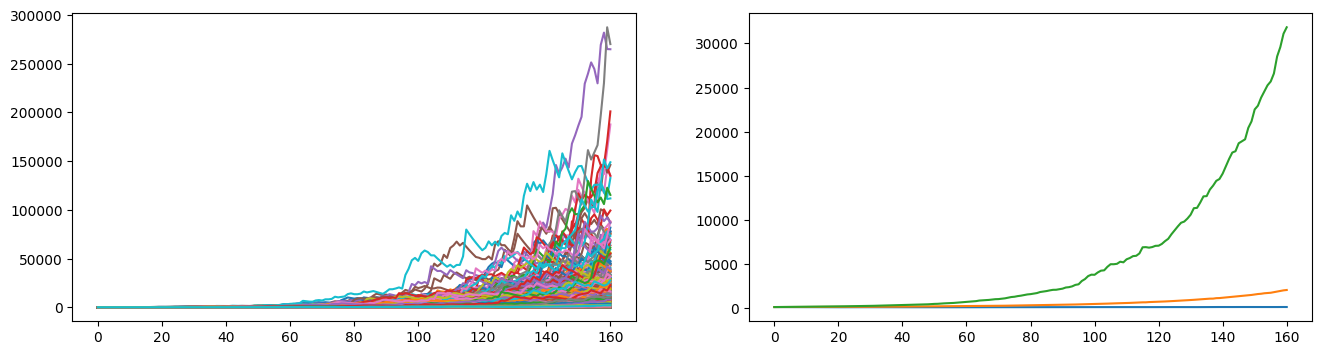

N trades                                                                                160.0
N Years                                                                                   5.0
Profitable [%]                                                                          100.0
Min. Equity                                                                        103.906218
Median Return [%]                                                                 1934.984079
Median Drawdown [%]                                                                 32.284921
Max. Drawdown [%]                                                                   69.138331
Return / DD                                                                         59.934608
>= 10% DD [%]                                                                           100.0
>= 20% DD [%]                                                                           96.24
>= 30% DD [%]                                               

In [215]:
stats = monte_carlo(sample=trade_R, n_trades=32, n_years=5, pc_equity=1.5, runs=2500)
stats